In [1]:
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

# Load images, classes and Transform them into Datasets

In [2]:
class_names = sorted(os.listdir('./SeaAnimals'))
class_names

['Clams',
 'Corals',
 'Crabs',
 'Dolphin',
 'Eel',
 'Fish',
 'Jelly Fish',
 'Lobster',
 'Nudibranchs',
 'Octopus',
 'Otter',
 'Penguin',
 'Puffers',
 'Sea Rays',
 'Sea Urchins',
 'Seahorse',
 'Seal',
 'Sharks',
 'Shrimp',
 'Squid',
 'Starfish',
 'Turtle_Tortoise',
 'Whale']

## Getting Image Paths and Split them into Train, Validation and Test Datasets

In [11]:
def paths():
    paths = list()
    for ani_type in class_names:
        base_name = "./SeaAnimals/{}/".format(ani_type)
        for img_name in os.listdir(base_name):
            paths.append(base_name + img_name)
    return paths

paths = paths()

In [12]:
train_paths, val_test_paths= train_test_split(paths, test_size=0.2, random_state=1029)
val_paths, test_paths = train_test_split(val_test_paths, test_size=0.5, random_state=1029)

In [13]:
train_paths[1].split('/')[2]

'Turtle_Tortoise'

In [14]:
def train_val_test_dataset(name, paths):
    os.mkdir('./splitted_SeaAnimals/' + name)
    for ani_type in class_names:
        os.mkdir('./splitted_SeaAnimals/'+ name + '/' + ani_type)
        
    for i in range(len(paths)):
        for ani_type in class_names:
             if (paths[i].split('/')[2] == ani_type):
                img = Image.open(paths[i])
                img = img.convert('RGB')
                img.save('./splitted_SeaAnimals/'+ name + '/'+ ani_type + '/' + paths[i].split('/')[3] )


In [23]:
train_val_test_dataset('train', train_paths)

In [24]:
train_val_test_dataset('val', val_paths)

In [25]:
train_val_test_dataset('test', test_paths)

# Loading Random Images from Train, Val, Test

In [68]:
def random_image(directory):
    random_paths = list()
    classes = sorted(os.listdir(directory))
    for ani_type in classes:
        dir_paths = list()
        base_name = directory + '/' + ani_type
        for image_name in os.listdir(base_name):
            dir_paths.append(base_name + '/' + image_name)
        random_paths.append(np.random.choice(dir_paths))

    plt.figure(figsize=(16, 16))
    for i, path in enumerate(random_paths):  
        plt.subplot(6,4,i+1)
        plt.imshow(plt.imread(path))
        plt.title(path.split('/')[3],fontsize=10,color='blue')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()       
    

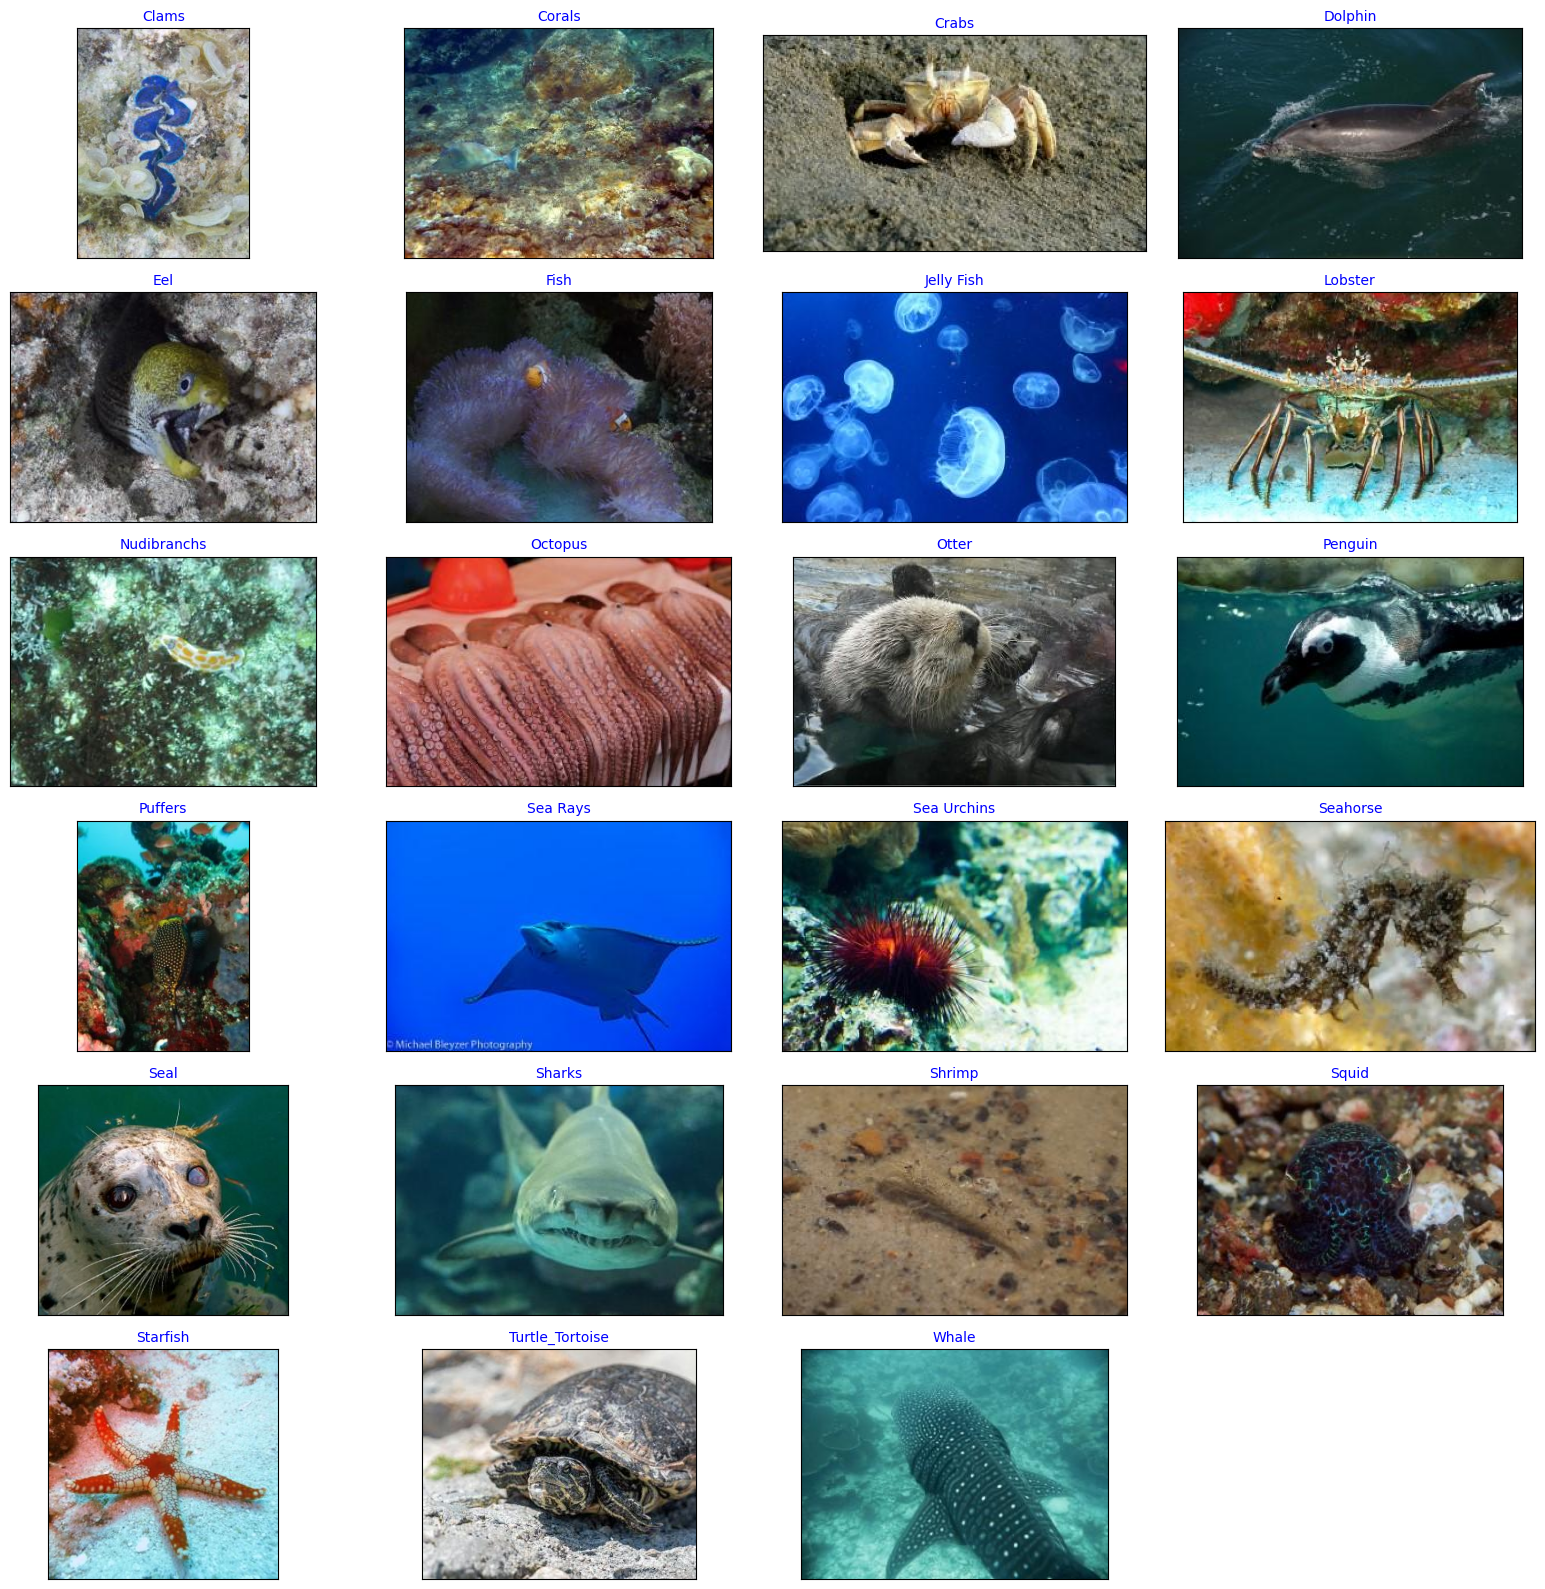

In [69]:
random_image('./splitted_SeaAnimals/train')

In [48]:
def num(file_name):
    count = {}
    for i in class_names:
        number = os.listdir('./splitted_SeaAnimals/{}/{}/'.format(file_name,i))
        count[i] = len(number)
    plt.figure(figsize=(20, 6))
    y_values =list(count.values())
    sns.barplot(x=class_names, y= y_values)
    plt.xlabel('Class Names')
    plt.ylabel('Count')
    plt.title('Counts of files in each class')
    plt.xticks(rotation=45)
    plt.show()

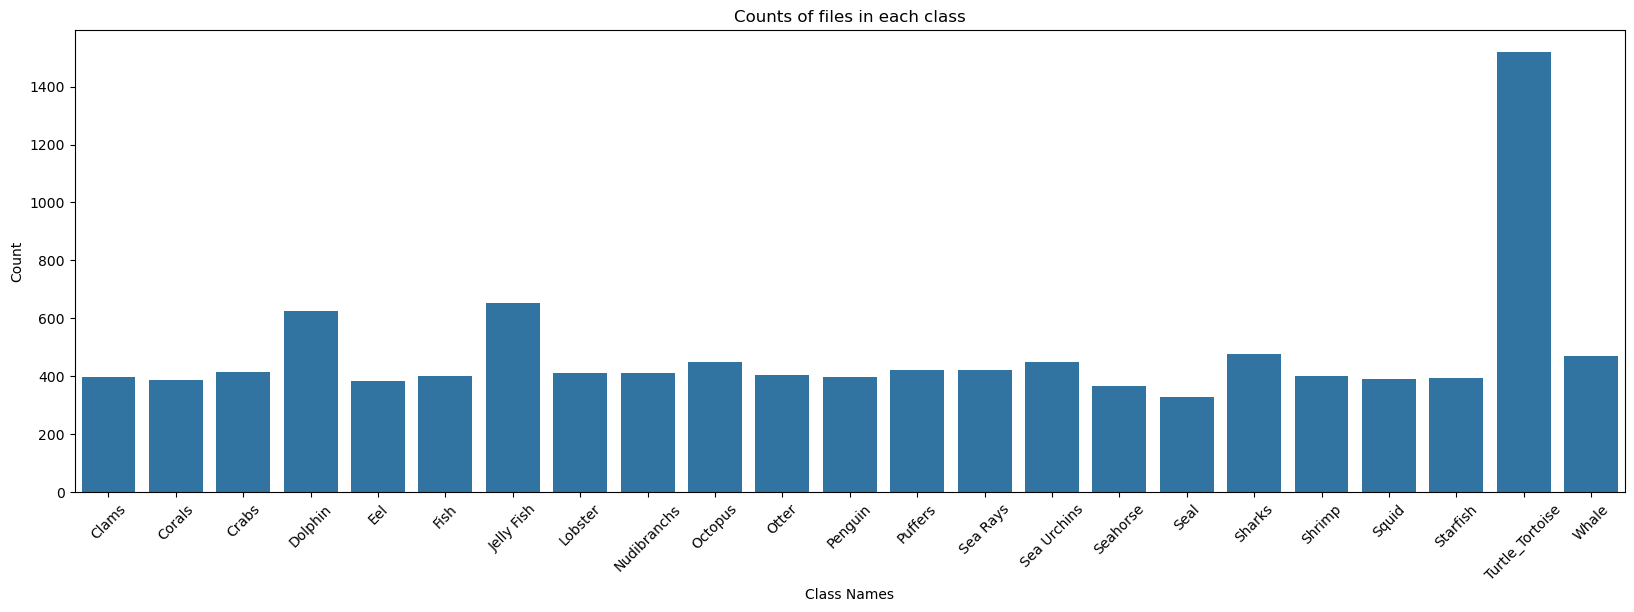

In [52]:
num('train')

# Image Processing

In [57]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds =  train_gen.flow_from_directory(
            './splitted_SeaAnimals/train',
            target_size=(299, 299),
            batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds =  val_gen.flow_from_directory(
         './splitted_SeaAnimals/val',
          target_size=(299, 299),
          batch_size=32,
          shuffle=False
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './splitted_SeaAnimals/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 10968 images belonging to 23 classes.
Found 1371 images belonging to 23 classes.
Found 1372 images belonging to 23 classes.


In [73]:
X,y =next(train_ds)

In [74]:
train_ds.class_indices

{'Clams': 0,
 'Corals': 1,
 'Crabs': 2,
 'Dolphin': 3,
 'Eel': 4,
 'Fish': 5,
 'Jelly Fish': 6,
 'Lobster': 7,
 'Nudibranchs': 8,
 'Octopus': 9,
 'Otter': 10,
 'Penguin': 11,
 'Puffers': 12,
 'Sea Rays': 13,
 'Sea Urchins': 14,
 'Seahorse': 15,
 'Seal': 16,
 'Sharks': 17,
 'Shrimp': 18,
 'Squid': 19,
 'Starfish': 20,
 'Turtle_Tortoise': 21,
 'Whale': 22}

In [71]:
X

array([[[[-0.9764706 , -0.5686275 , -0.54509807],
         [-0.9764706 , -0.56078434, -0.5294118 ],
         [-0.9607843 , -0.54509807, -0.5137255 ],
         ...,
         [-0.99215686, -0.6156863 , -0.5137255 ],
         [-0.99215686, -0.6156863 , -0.5294118 ],
         [-0.9764706 , -0.6156863 , -0.56078434]],

        [[-0.9764706 , -0.5686275 , -0.54509807],
         [-0.9764706 , -0.56078434, -0.5294118 ],
         [-0.9607843 , -0.54509807, -0.5137255 ],
         ...,
         [-0.99215686, -0.6156863 , -0.5137255 ],
         [-0.99215686, -0.6156863 , -0.5294118 ],
         [-0.9764706 , -0.62352943, -0.56078434]],

        [[-1.        , -0.6       , -0.56078434],
         [-1.        , -0.58431375, -0.56078434],
         [-0.99215686, -0.5686275 , -0.54509807],
         ...,
         [-0.99215686, -0.6392157 , -0.56078434],
         [-0.99215686, -0.6392157 , -0.5686275 ],
         [-0.99215686, -0.654902  , -0.5686275 ]],

        ...,

        [[-1.        , -0.99215686, -0

In [72]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0.,

## Get Base model from Imagenet(only filtering paths) and put Dense Layer

In [58]:
def make_model(learning_rate=0.01, size_inner=50):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(298, 298, 3)
    )
    base_model.trainable = False

    ###########################################
    
    inputs = keras.Input(shape=(298, 298, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(23)(inner)
    
    model = keras.Model(inputs, outputs)

    ###########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [59]:
scores = {}

for lr in [ 0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
343/343 [==============================] - 111s 318ms/step - loss: 2.0205 - accuracy: 0.5217 - val_loss: 1.2892 - val_accuracy: 0.7177
Epoch 2/10
343/343 [==============================] - 109s 317ms/step - loss: 1.0516 - accuracy: 0.7546 - val_loss: 0.8938 - val_accuracy: 0.7805
Epoch 3/10
343/343 [==============================] - 109s 318ms/step - loss: 0.8140 - accuracy: 0.7897 - val_loss: 0.7750 - val_accuracy: 0.7980
Epoch 4/10
343/343 [==============================] - 109s 318ms/step - loss: 0.7188 - accuracy: 0.8019 - val_loss: 0.7204 - val_accuracy: 0.7987
Epoch 5/10
343/343 [==============================] - 109s 319ms/step - loss: 0.6642 - accuracy: 0.8138 - val_loss: 0.6831 - val_accuracy: 0.8031
Epoch 6/10
343/343 [==============================] - 110s 320ms/step - loss: 0.6264 - accuracy: 0.8215 - val_loss: 0.6606 - val_accuracy: 0.8140
Epoch 7/10
343/343 [==============================] - 110s 321ms/step - loss: 0.5971 - accuracy: 0.8287 - val_loss: 0

KeyboardInterrupt: 

In [60]:
learning_rate = 0.001

scores = {}

for size in [ 1000, 100, 50, 25]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

1000
Epoch 1/10
343/343 [==============================] - 111s 319ms/step - loss: 0.7777 - accuracy: 0.7697 - val_loss: 0.6376 - val_accuracy: 0.8074
Epoch 2/10
343/343 [==============================] - 111s 323ms/step - loss: 0.5015 - accuracy: 0.8431 - val_loss: 0.6983 - val_accuracy: 0.7994
Epoch 3/10
343/343 [==============================] - 112s 327ms/step - loss: 0.4007 - accuracy: 0.8752 - val_loss: 0.6340 - val_accuracy: 0.8220
Epoch 4/10
343/343 [==============================] - 112s 326ms/step - loss: 0.3166 - accuracy: 0.9034 - val_loss: 0.6345 - val_accuracy: 0.8271
Epoch 5/10
343/343 [==============================] - 112s 327ms/step - loss: 0.2583 - accuracy: 0.9178 - val_loss: 0.7465 - val_accuracy: 0.8074
Epoch 6/10
343/343 [==============================] - 111s 324ms/step - loss: 0.2166 - accuracy: 0.9319 - val_loss: 0.7141 - val_accuracy: 0.8206
Epoch 7/10
343/343 [==============================] - 111s 325ms/step - loss: 0.1611 - accuracy: 0.9479 - val_loss: 0.8

In [61]:
def make_model(learning_rate=0.001, size_inner=50, droprate=0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299, 3)
    )
    base_model.trainable = False

    ###########################################
    
    inputs = keras.Input(shape=(299, 299, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(23)(drop)
    
    model = keras.Model(inputs, outputs)

    ###########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [62]:
learning_rate = 0.001
size = 50
scores = {}

for droprate in [0.0, 0.2, 0.5]:
    print(droprate)

    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/10
343/343 [==============================] - 232s 671ms/step - loss: 0.9213 - accuracy: 0.7481 - val_loss: 0.6609 - val_accuracy: 0.8016
Epoch 2/10
343/343 [==============================] - 125s 365ms/step - loss: 0.5639 - accuracy: 0.8322 - val_loss: 0.6366 - val_accuracy: 0.8147
Epoch 3/10
343/343 [==============================] - 146s 425ms/step - loss: 0.4817 - accuracy: 0.8544 - val_loss: 0.6329 - val_accuracy: 0.8228
Epoch 4/10
343/343 [==============================] - 317s 926ms/step - loss: 0.4229 - accuracy: 0.8730 - val_loss: 0.6413 - val_accuracy: 0.8053
Epoch 5/10
343/343 [==============================] - 282s 820ms/step - loss: 0.3796 - accuracy: 0.8853 - val_loss: 0.6105 - val_accuracy: 0.8322
Epoch 6/10
343/343 [==============================] - 293s 854ms/step - loss: 0.3388 - accuracy: 0.8984 - val_loss: 0.6346 - val_accuracy: 0.8198
Epoch 7/10
343/343 [==============================] - 297s 865ms/step - loss: 0.3034 - accuracy: 0.9066 - val_loss: 0.65

In [63]:
    model = make_model(learning_rate=0.001, size_inner=50, droprate=0.1)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

Epoch 1/10
343/343 [==============================] - 110s 317ms/step - loss: 1.0461 - accuracy: 0.7089 - val_loss: 0.6696 - val_accuracy: 0.8038
Epoch 2/10
343/343 [==============================] - 109s 318ms/step - loss: 0.6413 - accuracy: 0.8130 - val_loss: 0.6454 - val_accuracy: 0.8155
Epoch 3/10
343/343 [==============================] - 109s 319ms/step - loss: 0.5592 - accuracy: 0.8328 - val_loss: 0.6021 - val_accuracy: 0.8235
Epoch 4/10
343/343 [==============================] - 110s 321ms/step - loss: 0.4997 - accuracy: 0.8519 - val_loss: 0.5916 - val_accuracy: 0.8242
Epoch 5/10
343/343 [==============================] - 111s 322ms/step - loss: 0.4493 - accuracy: 0.8660 - val_loss: 0.5945 - val_accuracy: 0.8213
Epoch 6/10
343/343 [==============================] - 110s 322ms/step - loss: 0.4109 - accuracy: 0.8766 - val_loss: 0.6081 - val_accuracy: 0.8228
Epoch 7/10
343/343 [==============================] - 110s 322ms/step - loss: 0.3812 - accuracy: 0.8844 - val_loss: 0.6235 -

In [64]:
def make_model(input_size=299, learning_rate=0.001, size_inner=50,
               droprate=0.2):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(23)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [65]:
input_size=299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=5.0,
    height_shift_range=5.0,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0,2]
)

train_ds = train_gen.flow_from_directory(
    './splitted_SeaAnimals/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './splitted_SeaAnimals/val',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './splitted_SeaAnimals/test',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 10968 images belonging to 23 classes.
Found 1371 images belonging to 23 classes.
Found 1372 images belonging to 23 classes.


In [66]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v6_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [68]:
input_size=299
learning_rate = 0.001
size = 50
droprate=0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=25, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/25
343/343 [==============================] - 178s 511ms/step - loss: 1.2652 - accuracy: 0.6482 - val_loss: 0.7076 - val_accuracy: 0.7994
Epoch 2/25
343/343 [==============================] - 176s 512ms/step - loss: 0.8662 - accuracy: 0.7494 - val_loss: 0.6288 - val_accuracy: 0.8104
Epoch 3/25
343/343 [==============================] - 176s 512ms/step - loss: 0.7873 - accuracy: 0.7687 - val_loss: 0.6272 - val_accuracy: 0.8096
Epoch 4/25
343/343 [==============================] - 21273s 62s/step - loss: 0.7278 - accuracy: 0.7842 - val_loss: 0.5974 - val_accuracy: 0.8177
Epoch 5/25
343/343 [==============================] - 174s 507ms/step - loss: 0.6961 - accuracy: 0.7929 - val_loss: 0.6022 - val_accuracy: 0.8213
Epoch 6/25
343/343 [==============================] - 175s 511ms/step - loss: 0.6742 - accuracy: 0.7991 - val_loss: 0.5942 - val_accuracy: 0.8184
Epoch 7/25
343/343 [==============================] - 177s 515ms/step - loss: 0.6414 - accuracy: 0.8082 - val_loss: 0.5829 -

# Testing

In [79]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './splitted_SeaAnimals/test',
    target_size=(150, 150),
    batch_size=64,
    shuffle=False
)

Found 1372 images belonging to 23 classes.


In [3]:
model = keras.models.load_model('xception_v6_1_12_0.834.h5')

In [86]:
model.evaluate(test_ds)

22/22 [==============================] - 3s 106ms/step - loss: 1.5542 - accuracy: 0.7259


[1.5542309284210205, 0.7259474992752075]

In [7]:
path = './SeaAnimals/Lobster/378049057_357ce9081f_o.jpg'
img = load_img(path, target_size=(299, 299))

x = np.array(img)
X = np.array([x])
X.shape

X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 0s 21ms/step


In [11]:
result = list(zip(class_names, pred[0]))
max_result = max(result, key=lambda x:x[1])
print(max_result)

('Lobster', 8.348244)


In [101]:
pred

array([[-0.7903162 , -2.690924  ,  0.09854949, -7.8142185 , -0.9501694 ,
        -2.5682516 , -4.24086   ,  8.348244  , -1.2874802 ,  0.8346539 ,
        -6.430128  , -3.2671263 , -1.2618604 , -2.4189794 , -6.847247  ,
        -1.1137116 , -2.270305  , -4.618009  ,  4.83627   ,  0.09821416,
        -7.198043  , -2.8317378 , -6.181436  ]], dtype=float32)

In [102]:
result = list(zip(class_names, pred[0]))
for i in range(len(result)):
    if (result[i][1] >= 1):
        print(result[i])

('Lobster', 8.348244)
('Shrimp', 4.83627)


In [96]:
path = wget 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmPvwzyGCtCQbjhfAnZCkZGNCtaqG3T_kkF1J74KbOOw&s'
img = load_img(path, target_size=(299, 299))

SyntaxError: invalid syntax (1172047441.py, line 1)

In [105]:
from PIL import Image
import requests
from io import BytesIO

url = "https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcSwtJBn5sU62o48DTVRGisIbCDy0bOuEsRZr1wRy5drsH5woQJr"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

x = np.array(img)
X = np.array([x])
X.shape

X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 0s 384ms/step


In [106]:
result = list(zip(class_names, pred[0]))
for i in range(len(result)):
    if (result[i][1] >= 1):
        print(result[i])

('Jelly Fish', 3.550882)
('Seahorse', 1.7821726)
